<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/5week/DL_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5주차/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [150]:
X = df.drop(columns=["BMI"])
y = df["BMI"]

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,0
764,2,122,70,27,0,0.340,27,0
765,5,121,72,23,112,0.245,30,0
766,1,126,60,0,0,0.349,47,1


In [151]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


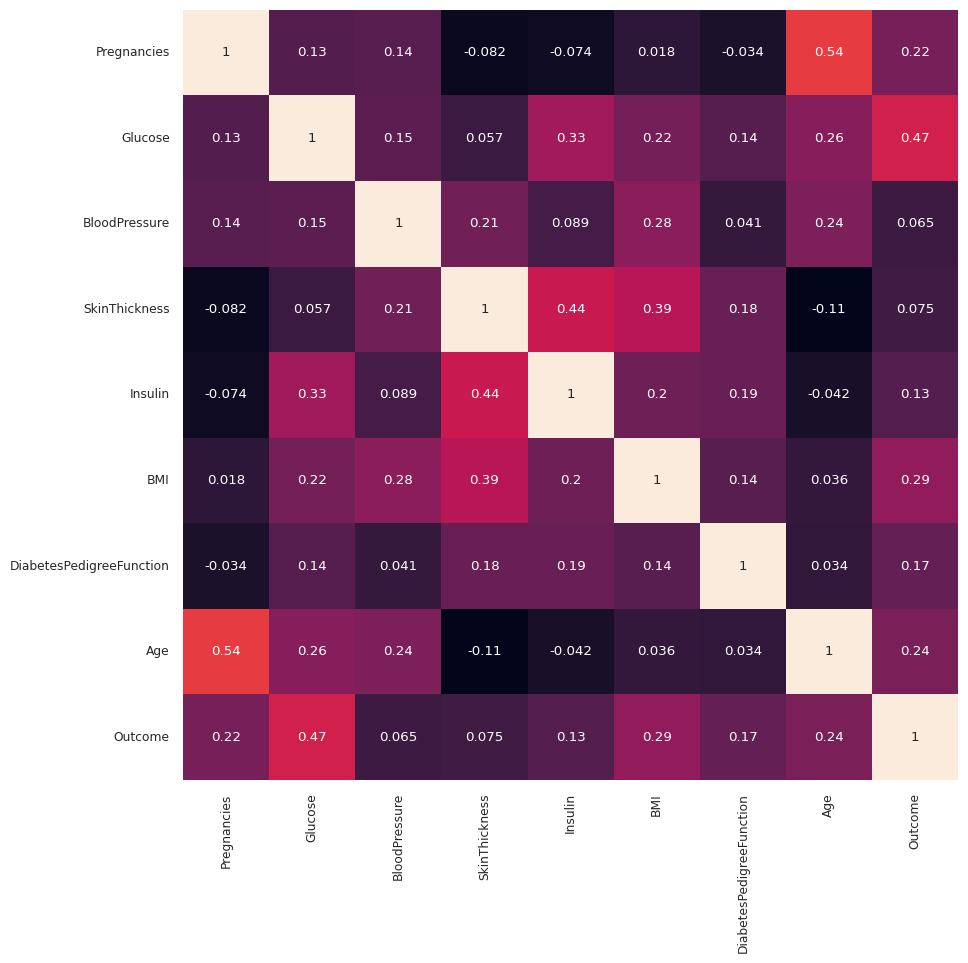

In [152]:
import seaborn as sns

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [154]:
y = pd.get_dummies(y).values

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,920 (11.41 KB)

 Trainable params: 2,920 (11.41 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
N_EPOCHS = 15

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1057.1271 - mse: 1057.1271 - val_loss: 377.1604 - val_mse: 377.1604
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 280.0246 - mse: 280.0246 - val_loss: 125.8192 - val_mse: 125.8192
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.5709 - mse: 95.5709 - val_loss: 81.8383 - val_mse: 81.8383
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.5363 - mse: 66.5363 - val_loss: 88.4870 - val_mse: 88.4870
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.4425 - mse: 72.4425 - val_loss: 70.8706 - val_mse: 70.8706
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.2069 - mse: 58.2069 - val_loss: 70.2638 - val_mse: 70.2638
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.1726 - mse: 57.1726 - val_loss: 70.7262 - val_mse: 70.7262
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.6262 - mse: 47.6262 - val_loss: 77.7519 - val_mse: 77.7519
Epoch 9/15
20/20 ━━━━━━━━━━━━

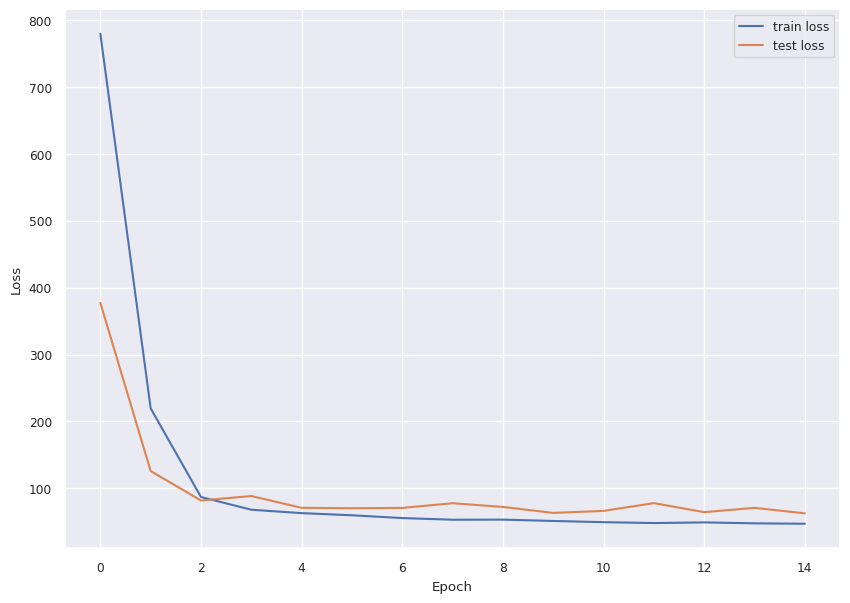

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()